['x', 'y']
(10000, 224, 224, 3)
(10000, 1)


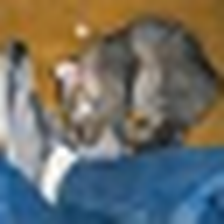

In [1]:
import os
import numpy as np
from PIL import Image

# test_data = np.load(os.path.join(path, 'test_224.npz'))
#test_data = np.load(r'X:\Directory\code\Invisiable-Construction-Learning-Backdoor\datasets\Fashion-MNIST\test224.npz')
test_data = np.load(r'D:\code\dataset\cifar10-SAB\test224.npz')
print(test_data.files)

print(test_data['x'].shape)
print(test_data['y'].shape)
# print(type(test_data['y']))
# print(test_data['x'])

img = Image.fromarray(test_data['x'][0])
display(img)

In [14]:
import struct
import pickle
import sys
import numpy as np
from PIL import Image

def read_label(file_name):
    '''
    :param file_name:
    :return:
    标签的格式如下：
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.
    '''
    file_handle = open(file_name, "rb")  # 以二进制打开文档
    file_content = file_handle.read()  # 读取到缓冲区中
    head = struct.unpack_from('>II', file_content, 0)  # 取前2个整数，返回一个元组
    offset = struct.calcsize('>II')
    labelNum = head[1]  # label数
    bitsString = '>' + str(labelNum) + 'B'  # fmt格式：'>47040000B'
    label = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    return np.array(label)

data = open(r"X:\Directory\code\dataset\Fashion-MNIST\poison/poison_Fmnist_test", "rb")
dict = pickle.load(data, encoding='latin1')
benign_Fmnist_train_data = dict#.astype(float)
print(benign_Fmnist_train_data.shape)

img = []

data = np.array([[i] for i in benign_Fmnist_train_data]).reshape(10000,32,32,3).astype(np.uint8)
print(data.shape)

images_resized = np.array([np.array(Image.fromarray(image).resize((224, 224), Image.ANTIALIAS)) for image in data])
print(images_resized.shape)
display(Image.fromarray(images_resized[0]))

label = r"X:\Directory\code\dataset\Fashion-MNIST\poison/test_label"
benign_Fmnist_train_label = read_label(label).tolist()
print(benign_Fmnist_train_label)

label = np.array([[i] for i in benign_Fmnist_train_label]).astype(np.uint8)
print(label)

np.savez(r'X:\Directory\code\dataset\Fashion-MNIST\poison/poison_test224.npz', x = images_resized, y = label)


(10000, 3072)
(10000, 32, 32, 3)
[0, 1, 2, 2, 3, 2, 8, 6, 5, 0, 3, 4, 4, 6, 8, 5, 6, 3, 6, 4, 4, 4, 2, 1, 5, 7, 8, 4, 4, 1, 5, 7, 7, 8, 1, 0, 9, 8, 0, 8, 2, 0, 4, 6, 2, 0, 3, 3, 2, 3, 2, 2, 9, 3, 0, 9, 9, 4, 6, 0, 4, 5, 4, 6, 1, 1, 0, 9, 5, 2, 7, 3, 4, 6, 5, 7, 1, 6, 1, 4, 9, 8, 1, 2, 4, 8, 9, 4, 1, 6, 3, 4, 2, 2, 2, 6, 4, 7, 7, 3, 9, 3, 9, 0, 8, 2, 3, 8, 2, 7, 5, 5, 3, 2, 7, 5, 0, 2, 7, 1, 0, 5, 4, 4, 7, 0, 8, 5, 0, 3, 1, 7, 9, 4, 9, 6, 4, 4, 2, 4, 3, 3, 3, 2, 2, 6, 0, 0, 1, 3, 4, 3, 3, 1, 9, 3, 3, 3, 9, 5, 6, 7, 7, 3, 2, 4, 0, 8, 7, 2, 2, 8, 9, 0, 2, 4, 4, 5, 7, 9, 9, 1, 3, 9, 1, 5, 5, 6, 0, 7, 4, 9, 1, 6, 0, 0, 0, 4, 0, 9, 0, 4, 2, 5, 5, 8, 6, 2, 1, 9, 0, 4, 7, 1, 9, 5, 9, 0, 2, 8, 5, 7, 7, 3, 2, 4, 5, 7, 8, 1, 9, 5, 6, 2, 9, 7, 4, 0, 9, 2, 1, 5, 7, 7, 0, 2, 4, 5, 3, 3, 8, 1, 6, 2, 4, 8, 6, 9, 8, 3, 3, 2, 4, 2, 2, 9, 3, 9, 2, 8, 6, 8, 8, 2, 7, 2, 5, 5, 9, 5, 8, 2, 4, 8, 4, 8, 3, 1, 2, 2, 2, 1, 8, 1, 3, 3, 4, 1, 7, 0, 5, 2, 0, 7, 6, 6, 7, 4, 7, 7, 1, 6, 6, 6, 7, 8, 7, 0, 9, 2, 0, 2, 

In [ ]:
with open(r'X:\Directory\code\dataset\cifar-100-python\test', 'rb') as test:
    poison_test = pickle.load(test)
test_data = poison_test.get('data').reshape(10000, 32, 32, 3).astype(np.uint8)
test_label = poison_test.get('fine_labels')



with open(r'X:\Directory\code\dataset\cifar-100-python\train', 'rb') as train:
    poison_test = pickle.load(train)
train_data = poison_test.get('data').reshape(50000, 32, 32, 3).astype(np.uint8)

train_label = poison_test.get('fine_labels')
label = np.array([[i] for i in train_label]).astype(np.uint8)


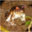

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


'\nlabel = get_benign_cifar10_train_label()\nlabel = np.array([[i] for i in label]).astype(np.uint8)\n\nprint(label)\n\n'

In [2]:
from PIL import Image
import numpy as np
import pickle


dataset_path = "X:/Directory/code/dataset/cifar-10-batches-py"

def get_benign_cifar10():
    def load_batch(file):
        with open(f'{file}', 'rb') as f:
            batch = pickle.load(f, encoding='latin1')
            
            data = batch['data'].reshape(10000, 3, 32, 32)
            # 将数据重新排列为 [10000, 32, 32, 3] (即将通道放在最后)
            data = data.transpose(0, 2, 3, 1)
            
        return data

    # 加载所有数据批次
    batches = [load_batch(f'{dataset_path}/data_batch_{i}') for i in range(1, 6)]
    # 堆叠所有数据
    benign_cifar_train_data = np.vstack(batches)

    # 转换为PIL图像列表
    benign = np.array([np.array(Image.fromarray(image)) for image in benign_cifar_train_data]).astype(np.uint8)
    #images_resized = np.array([np.array(Image.fromarray(image).resize((224, 224), Image.ANTIALIAS)) for image in benign])
    #print(images_resized.shape)
    display(Image.fromarray(benign[0]))
    
    return benign

def get_benign_cifar10_train_label():

    def load_labels(file):
        with open(f'{file}', 'rb') as f:
            batch = pickle.load(f, encoding='latin1')
        return batch['labels']

    # 加载所有标签批次
    labels = [load_labels(f'{dataset_path}/data_batch_{i}') for i in range(1, 6)]
    # 合并所有标签
    benign_cifar10_train_label = sum(labels, [])

    return benign_cifar10_train_label


data = get_benign_cifar10()
print(type(data))
print(data.shape)
# print(data)
'''
label = get_benign_cifar10_train_label()
label = np.array([[i] for i in label]).astype(np.uint8)

print(label)

'''
# np.savez(r'X:/Directory/code/dataset/cifar-10-batches-py/train224.npz', x = data, y = label)

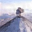

(10000, 32, 32, 3)
(10000, 1)


In [21]:
import pickle
from PIL import Image
import numpy as np

with open(r'X:\Directory\code\dataset\SAB_cifar100/test', 'rb') as train:
    data = pickle.load(train, encoding='latin1').get('data')
    data = data.reshape(10000, 3, 32, 32)
    # 将数据重新排列为 [10000, 32, 32, 3] (即将通道放在最后)
    data = data.transpose(0, 2, 3, 1)

benign = np.array([np.array(Image.fromarray(image)) for image in data]).astype(np.uint8)
#images_resized = np.array([np.array(Image.fromarray(image).resize((224, 224), Image.ANTIALIAS)) for image in benign])
display(Image.fromarray(benign[0]))
print(benign.shape)

with open(r'X:\Directory\code\dataset\SAB_cifar100/test', 'rb') as train:
    label = pickle.load(train, encoding='latin1').get('fine_labels')
label = np.array([[i] for i in label]).astype(np.uint8)
print(label.shape)

np.savez(r'D:\code\dataset\cifar100-SAB/test.npz', x = benign, y = label)